In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-2.csv'
df2 = pd.read_csv(url)

In [3]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [4]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [5]:
df4 = df4.dropna()
df4.shape

(1099, 19)

In [6]:
df4['playlist_id'].value_counts()

4hKPJNFIhdAg4pAksn78FJ    11
3ykXidKLz1eYPvuGoFlD1e    11
1qXg9ck25tBRxeXsj8mbDG    10
5jROYSZSL7cO0jGAqkPx7C    10
4NlAd9NpIa92IjErMyAriM    10
                          ..
37i9dQZF1DWTc5QDlvD7t0     1
1QJ66s6YBZgxMUaVUyrhbo     1
3HjTMn6O6adW8vcSMnqmhw     1
4csIMGPI3aGo3Xy7WG8jBi     1
4frhr6RQM2fMOm2mpvOVo6     1
Name: playlist_id, Length: 359, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [8]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [9]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [10]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [13]:
df5.head(2)

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,language,emotion
0,41,rock,0.682,0.401,2,-10.068,1,0.0236,0.2790,0.01170,0.0887,0.566,97.091,tl,6
1,28,rock,0.303,0.880,9,-4.739,1,0.0442,0.0117,0.00994,0.3470,0.404,135.225,en,1


In [14]:
cols = ['language', 'playlist_genre']
df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [15]:
df11 = df5

In [16]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [17]:
df11.iloc[517,15]

'Bandito'

In [18]:
df12 = df11.set_index('track_name')

In [19]:
testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [20]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(1099, 14)

In [21]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [22]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [23]:
df5.shape
scaler = MinMaxScaler()

In [24]:
df5['emotion'].value_counts()

1     393
6     137
3     108
5     103
7      91
2      91
4      67
8      39
10     38
9      32
Name: emotion, dtype: int64

In [25]:
train_data_001 = df5.iloc[:1024,6:14]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
train_data_001.columns

Index(['mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'language'],
      dtype='object')

In [26]:
testdf1_2 = testdf1_1.iloc[:1024,6:14]
testdf2_2 = testdf2_1.iloc[:1024,6:14]
testdf3_2 = testdf3_1.iloc[:1024,6:14]
df13 = df12.iloc[:1024,6:14]

In [27]:
(train_data_01 < 0).values.any()

False

In [28]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [29]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [30]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [31]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [32]:
discriminator = Discriminator()

In [33]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [34]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

In [35]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [36]:
 len(list(train_loader)[0][0])

32

In [37]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]
losses_g =[]
losses_d = []

In [38]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.rand((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.rand((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        losses_g.append(loss_generator)
        losses_d.append(loss_discriminator)

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 0.5163606405258179
Epoch: 0 Loss G.: 1.2449159622192383
Epoch: 10 Loss D.: 0.33247682452201843
Epoch: 10 Loss G.: 1.7874040603637695
Epoch: 20 Loss D.: 0.7137839794158936
Epoch: 20 Loss G.: 0.8642800450325012
Epoch: 30 Loss D.: 0.4306289255619049
Epoch: 30 Loss G.: 1.4227604866027832
Epoch: 40 Loss D.: 0.3178339898586273
Epoch: 40 Loss G.: 1.3306766748428345
Epoch: 50 Loss D.: 0.6588230133056641
Epoch: 50 Loss G.: 0.8140596151351929
Epoch: 60 Loss D.: 0.6289677619934082
Epoch: 60 Loss G.: 1.3216392993927002
Epoch: 70 Loss D.: 0.34665408730506897
Epoch: 70 Loss G.: 1.1252751350402832
Epoch: 80 Loss D.: 0.8366276621818542
Epoch: 80 Loss G.: 1.8067576885223389
Epoch: 90 Loss D.: 0.5457554459571838
Epoch: 90 Loss G.: 0.8210006356239319
Epoch: 100 Loss D.: 0.47317665815353394
Epoch: 100 Loss G.: 1.7746835947036743
Epoch: 110 Loss D.: 0.5850603580474854
Epoch: 110 Loss G.: 0.7888298034667969
Epoch: 120 Loss D.: 0.4041711390018463
Epoch: 120 Loss G.: 1.1905429363250732
Epoch

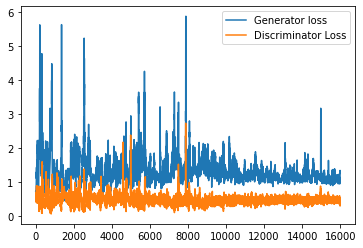

In [39]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.show()

In [40]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [41]:
latent_space_samples[:10]

tensor([[0.4797, 0.7396, 0.3567, 0.5027, 0.6961, 0.2708, 0.5215, 0.9721],
        [0.8166, 0.7093, 0.3920, 0.7160, 0.7434, 0.7919, 0.3383, 0.3230],
        [0.8430, 0.0013, 0.2740, 0.6263, 0.7999, 0.2261, 0.0748, 0.4803],
        [0.1167, 0.3979, 0.6377, 0.0834, 0.4010, 0.9383, 0.9291, 0.5702],
        [0.1642, 0.4335, 0.9529, 0.6786, 0.9019, 0.3670, 0.0339, 0.9290],
        [0.4251, 0.2021, 0.5880, 0.4181, 0.8452, 0.2619, 0.3830, 0.0430],
        [0.0444, 0.0468, 0.5084, 0.6022, 0.0962, 0.2262, 0.7128, 0.7749],
        [0.3663, 0.6678, 0.1869, 0.3901, 0.5297, 0.3679, 0.6881, 0.5417],
        [0.1230, 0.8613, 0.9459, 0.4671, 0.1420, 0.6923, 0.4868, 0.7261],
        [0.8605, 0.1643, 0.3228, 0.0426, 0.7859, 0.1615, 0.0150, 0.7343]])

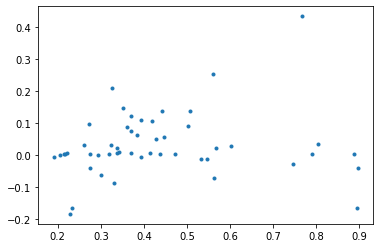

In [42]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [43]:
from scipy.spatial import distance

In [44]:
float_x = real_samples[0].double()

In [45]:
float_x = list(float_x.numpy())

In [46]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.155


In [47]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [48]:
#jaccard_score(final_generated_samples_df.iloc[0,:].values,float_x)

In [49]:
final_generated_samples_df.iloc[0,:].values

array([ 0.27301502,  0.12741697, -0.09381773, -0.04160795,  0.0972717 ,
        0.34476906,  0.2751385 ,  0.2408122 ])

In [50]:
real_samples[0]

tensor([0.0000, 0.0326, 0.2237, 0.0000, 0.0695, 0.7762, 0.2402, 0.1667])

In [51]:
final_generated_samples_df.iloc[3,:].values

array([ 0.94409865, -0.19053116,  0.27844983, -0.18435183,  0.41430041,
        0.46538585,  0.2284945 ,  0.38030392])

In [52]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [53]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [54]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [55]:
train_data_vals2[517]

array([1.00000e+00, 5.91000e-02, 3.33000e-01, 0.00000e+00, 1.28000e-01,
       4.47000e-01, 1.32097e+02, 8.00000e+00])

In [56]:
generated_vals=[]
for i, j in final_generated_samples_df.iterrows():
  generated_vals.append(j.values)

train_data_vals=[]
for i, j in train_data_01.iterrows():
  train_data_vals.append(j.values)

def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cos.append(rec_score)
  rec_idx = df13.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

In [57]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_euc.append(rec_score)
  rec_idx = df13.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [58]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 0.616


In [59]:
df5.shape

(1099, 15)

In [60]:
# pick recommendations with cosine similarity
rec_cos = []
for i in generated_vals3:
  a = cos_similarity(i,train_data_vals2)

len train data: 1024 ; index: Not To Much - Remastered 2016 ; cos sim: [[0.99999431]]
len train data: 1024 ; index: LUNA ; cos sim: [[0.99987184]]
len train data: 1024 ; index: Sunburn ; cos sim: [[0.99999499]]
len train data: 1024 ; index: Ti volevo dedicare (feat. J-AX & Boomdabash) ; cos sim: [[0.99997158]]
len train data: 1024 ; index: Jungli Sher ; cos sim: [[0.99999551]]
len train data: 1024 ; index: My Death ; cos sim: [[0.99998884]]
len train data: 1024 ; index: Mamacita ; cos sim: [[0.99999127]]
len train data: 1024 ; index: Bad Moon Rising ; cos sim: [[0.99998804]]
len train data: 1024 ; index: Dag 1 ; cos sim: [[0.99998889]]
len train data: 1024 ; index: Gangsta ; cos sim: [[0.99999757]]


In [61]:
rec_cose=[]
for i in rec_cos:
  rec_cose.append(i[0][0])

In [62]:
# pick recommendations with euclidean similarity
rec_euc = []
for i in generated_vals3:
  a = euclid_similarity(i,train_data_vals2)

len train data: 1024 ; index: Latina (feat. Maluma) ; euclid sim: 0.6499354184564836
len train data: 1024 ; index: Saudi Arabi Money Rich - Babos Remix ; euclid sim: 5.07187280760539
len train data: 1024 ; index: Ruby ; euclid sim: 0.5108917589062818
len train data: 1024 ; index: Sincera ; euclid sim: 1.8125227486120083
len train data: 1024 ; index: Como Le Gusta a Tu Cuerpo (feat. Michel TelÃ³) ; euclid sim: 0.8854485326749256
len train data: 1024 ; index: Thing For You - David Guetta Remix ; euclid sim: 1.6198381427403146
len train data: 1024 ; index: Clubber Lang ; euclid sim: 2.497654628271512
len train data: 1024 ; index: Fuoh ; euclid sim: 1.119747133493521
len train data: 1024 ; index: Money Longer ; euclid sim: 2.3768509536790328
len train data: 1024 ; index: Stand By (feat. Rudimental) [#CWC19] ; euclid sim: 1.2883544352158696


In [63]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [64]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [65]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT1.append(rec_score)
  rec_idx = testdf1_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT1.append(rec_score)
  rec_idx = testdf1_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [66]:
#compare recomendations to test subjects
rec_cosT1 = []
for i in generated_vals3:
  a = cos_similarity_t1(i,test_data1)

len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99944855]]
len train data: 10 ; index: Prettiest Virgin (Radio Edit) ; cos sim: [[0.99987779]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99981384]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99801543]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99942968]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99961029]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99791031]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99995176]]
len train data: 10 ; index: Jungle ; cos sim: [[0.99998134]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99995773]]


In [67]:
rec_coseT1=[]
for i in rec_cosT1:
  rec_coseT1.append(i[0][0])

In [68]:
rec_eucT1 = []
for i in generated_vals3:
  a = euclid_similarity_t1(i,test_data1)

len train data: 10 ; index: Un autre que moi ; euclid sim: 3.397083670351683
len train data: 10 ; index: Tainted ; euclid sim: 4.9698084016828785
len train data: 10 ; index: Un autre que moi ; euclid sim: 8.778417865627514
len train data: 10 ; index: Un autre que moi ; euclid sim: 8.97244299864527
len train data: 10 ; index: Un autre que moi ; euclid sim: 5.1351631782937535
len train data: 10 ; index: I Dare You ; euclid sim: 5.354197181746733
len train data: 10 ; index: Song For You ; euclid sim: 9.293660325150348
len train data: 10 ; index: Jungle ; euclid sim: 6.709200241997494
len train data: 10 ; index: Afternoon ; euclid sim: 8.128734175958504
len train data: 10 ; index: Song For You ; euclid sim: 2.1001069364804095


In [69]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT2.append(rec_score)
  rec_idx = testdf2_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT2.append(rec_score)
  rec_idx = testdf2_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [70]:
#compare recomendations to test subjects
rec_cosT2 = []
for i in generated_vals3:
  a = cos_similarity_t2(i,test_data2)

len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99909709]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99987548]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99960228]]
len train data: 11 ; index: I'm Dreamin' ; cos sim: [[0.99742541]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99906778]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99932075]]
len train data: 11 ; index: I'm Dreamin' ; cos sim: [[0.99727461]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99985796]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99998281]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99986631]]


In [71]:
rec_coseT2=[]
for i in rec_cosT2:
  rec_coseT2.append(i[0][0])

In [72]:
rec_eucT2 = []
for i in generated_vals3:
  a = euclid_similarity_t2(i,test_data2)

len train data: 11 ; index: Tender Lover ; euclid sim: 4.431653402609859
len train data: 11 ; index: She's Playing Hard To Get ; euclid sim: 26.16088568281118
len train data: 11 ; index: I Adore Mi Amor ; euclid sim: 3.032638361902545
len train data: 11 ; index: I Adore Mi Amor ; euclid sim: 7.687784365768921
len train data: 11 ; index: Nasty ; euclid sim: 5.019248452774239
len train data: 11 ; index: Just Got Paid ; euclid sim: 7.451938321979546
len train data: 11 ; index: I'm Dreamin' ; euclid sim: 8.454327171069547
len train data: 11 ; index: Just Got Paid ; euclid sim: 22.645607760623477
len train data: 11 ; index: Just Got Paid ; euclid sim: 18.87491135185584
len train data: 11 ; index: Miss You Much ; euclid sim: 2.0840096256994673


In [73]:
def cos_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT3.append(rec_score)
  rec_idx = testdf3_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT3.append(rec_score)
  rec_idx = testdf3_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [74]:
#compare recomendations to test subjects
rec_cosT3 = []
for i in generated_vals3:
  a = cos_similarity_t3(i,test_data3)

len train data: 11 ; index: On Fire ; cos sim: [[0.99909224]]
len train data: 11 ; index: Feel It All Around ; cos sim: [[0.99987909]]
len train data: 11 ; index: Cool Blue ; cos sim: [[0.99959489]]
len train data: 11 ; index: Ghost - Lost Kings Remix ; cos sim: [[0.99742503]]
len train data: 11 ; index: Loudspeaker ; cos sim: [[0.99905872]]
len train data: 11 ; index: Cool Blue ; cos sim: [[0.99932523]]
len train data: 11 ; index: Loudspeaker ; cos sim: [[0.99727275]]
len train data: 11 ; index: Loudspeaker ; cos sim: [[0.9998543]]
len train data: 11 ; index: Cool Blue ; cos sim: [[0.99998083]]
len train data: 11 ; index: Cool Blue ; cos sim: [[0.99986352]]


In [75]:
rec_coseT3=[]
for i in rec_cosT3:
  rec_coseT3.append(i[0][0])

In [76]:
rec_eucT3 = []
for i in generated_vals3:
  a = euclid_similarity_t3(i,test_data3)

len train data: 11 ; index: Anywhere We Go ; euclid sim: 4.905110781954925
len train data: 11 ; index: Feel It All Around ; euclid sim: 3.3292516719967185
len train data: 11 ; index: On Fire ; euclid sim: 3.075515765872538
len train data: 11 ; index: On Fire ; euclid sim: 6.948621504056383
len train data: 11 ; index: Sway - Chainsmokers Remix ; euclid sim: 4.649374657598359
len train data: 11 ; index: Loudspeaker ; euclid sim: 6.210785599466507
len train data: 11 ; index: Indecision ; euclid sim: 8.571859400803458
len train data: 11 ; index: Hall & Oates ; euclid sim: 10.573132927089723
len train data: 11 ; index: Hall & Oates ; euclid sim: 13.97536442737571
len train data: 11 ; index: Loudspeaker ; euclid sim: 3.675522746039873


In [ ]:
rec_coseT1.extend(rec_coseT2)
rec_coseT1.extend(rec_coseT3)

In [79]:
print(rec_coseT1)

[0.9994485475229062, 0.999877792631692, 0.9998138390559335, 0.9980154256187528, 0.9994296793014785, 0.9996102928234575, 0.9979103117126699, 0.9999517602176865, 0.9999813372083886, 0.9999577299557322, 0.9990970904505925, 0.99987547878444, 0.9996022785643875, 0.9974254070062414, 0.9990677759631575, 0.999320747916991, 0.997274614289726, 0.9998579640296097, 0.9999828143668469, 0.9998663115523426, 0.9990922415460967, 0.9998790898355211, 0.9995948938115155, 0.9974250347930916, 0.9990587152972339, 0.9993252253987199, 0.9972727539334341, 0.9998542983788713, 0.9999808289198082, 0.9998635187937598]


In [ ]:
rec_eucT1.extend(rec_eucT2)
rec_eucT1.extend(rec_eucT3)

In [80]:
print(rec_eucT1)

[3.397083670351683, 4.9698084016828785, 8.778417865627514, 8.97244299864527, 5.1351631782937535, 5.354197181746733, 9.293660325150348, 6.709200241997494, 8.128734175958504, 2.1001069364804095, 4.431653402609859, 26.16088568281118, 3.032638361902545, 7.687784365768921, 5.019248452774239, 7.451938321979546, 8.454327171069547, 22.645607760623477, 18.87491135185584, 2.0840096256994673, 4.905110781954925, 3.3292516719967185, 3.075515765872538, 6.948621504056383, 4.649374657598359, 6.210785599466507, 8.571859400803458, 10.573132927089723, 13.97536442737571, 3.675522746039873]


In [81]:
EMrec_eucT1 = [35.176965141067015, 1.9268299909852165, 1.9047420878349246, 7.826505946481081, 
      6.309630580096539, 15.857601730419248, 4.901384764639936, 6.472439932521907, 
      8.54236947357641, 4.174764738340747, 17.365135683023084, 28.199844093102502, 
      3.0651343164257914, 39.52492464946355, 7.010483867227495, 2.1541002360687123, 
      3.908068346298906, 5.02946235463491, 17.016435207133192, 30.99735619602841, 
      33.846383915649334, 5.1046138893183635, 6.312012434562562, 13.003380810915484, 
      4.860154133650067, 8.724451217269525, 3.1557850860445744, 6.002758740244427, 
      5.288582911636616, 6.3159311600495975]

In [82]:
# leven test for eqaul variance p-value lower than 0.01 means not equal
from scipy.stats import levene
stat, p = levene(rec_eucT1, EMrec_eucT1)
print('pvalue > 0.01 means equal variance, pvalue:' ,p)

pvalue > 0.01 means equal variance, pvalue: 0.09586070646961316


In [84]:
from scipy import stats
stats.ttest_ind(rec_eucT1, EMrec_eucT1,equal_var = False)

Ttest_indResult(statistic=-1.5498166385433503, pvalue=0.1283844038448242)

The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.128) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.